In [6]:
import pandas as pd
import numpy as np

import statsmodels.formula.api as sm
import scipy.stats as stats

from matplotlib import pyplot as plt
%matplotlib inline

import seaborn as sns

###

df = pd.read_excel("IBM Employee Attrition.xlsx")
df.head()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,Sales,1,2,Life Sciences,1,2,Female,...,3,1,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,Research & Development,8,1,Life Sciences,2,3,Male,...,4,4,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,Research & Development,2,2,Other,4,4,Male,...,3,2,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,Research & Development,3,4,Life Sciences,5,4,Female,...,3,3,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,Research & Development,2,1,Medical,7,1,Male,...,3,4,1,6,3,3,2,2,2,2


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 30 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   Department                1470 non-null   object
 4   DistanceFromHome          1470 non-null   int64 
 5   Education                 1470 non-null   int64 
 6   EducationField            1470 non-null   object
 7   EmployeeNumber            1470 non-null   int64 
 8   EnvironmentSatisfaction   1470 non-null   int64 
 9   Gender                    1470 non-null   object
 10  JobInvolvement            1470 non-null   int64 
 11  JobLevel                  1470 non-null   int64 
 12  JobRole                   1470 non-null   object
 13  JobSatisfaction           1470 non-null   int64 
 14  MaritalStatus           

In [3]:
df.describe()

,Age,DistanceFromHome,Education,EmployeeNumber,EnvironmentSatisfaction,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,NumCompaniesWorked,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,9.192517,2.912925,1024.865306,2.721769,2.729932,2.063946,2.728571,6502.931293,2.693197,...,3.153741,2.712245,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,8.106864,1.024165,602.024335,1.093082,0.711561,1.106940,1.102846,4707.956783,2.498009,...,0.360824,1.081209,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1009.000000,0.000000,...,3.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,2.000000,2.000000,491.250000,2.000000,2.000000,1.000000,2.000000,2911.000000,1.000000,...,3.000000,2.000000,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,7.000000,3.000000,1020.500000,3.000000,3.000000,2.000000,3.000000,4919.000000,2.000000,...,3.000000,3.000000,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,14.000000,4.000000,1555.750000,4.000000,3.000000,3.000000,4.000000,8379.000000,4.000000,...,3.000000,4.000000,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,29.000000,5.000000,2068.000000,4.000000,4.000000,5.000000,4.000000,19999.000000,9.000000,...,4.000000,4.000000,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [4]:
dfz = df.copy()

print(dfz.shape)

(1470, 30)


In [7]:
dfz["zscore_MonthlyIncome"] = np.abs(stats.zscore(dfz["MonthlyIncome"]))

dfz.head()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,Gender,...,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,zscore_MonthlyIncome
0,41,Yes,Travel_Rarely,Sales,1,2,Life Sciences,1,2,Female,...,1,0,8,0,1,6,4,0,5,0.108350
1,49,No,Travel_Frequently,Research & Development,8,1,Life Sciences,2,3,Male,...,4,1,10,3,3,10,7,1,7,0.291719
2,37,Yes,Travel_Rarely,Research & Development,2,2,Other,4,4,Male,...,2,0,7,3,3,0,0,0,0,0.937654
3,33,No,Travel_Frequently,Research & Development,3,4,Life Sciences,5,4,Female,...,3,0,8,3,3,8,7,3,0,0.763634
4,27,No,Travel_Rarely,Research & Development,2,1,Medical,7,1,Male,...,4,1,6,3,3,2,2,2,2,0.644858


In [8]:
## Determine the index locations for the rows with zscores that are greater than "3"
z_outliers = dfz.loc[dfz["zscore_MonthlyIncome"] > 3].index

## Preview list of index values
print(z_outliers)

Int64Index([], dtype='int64')


In [9]:
dfz["zscore_Age"] = np.abs(stats.zscore(dfz["Age"]))
dfz["zscore_DistanceFromHome"] = np.abs(stats.zscore(dfz["DistanceFromHome"]))
dfz["zscore_Education"] = np.abs(stats.zscore(dfz["Education"]))
dfz["zscore_NumCompaniesWorked"] = np.abs(stats.zscore(dfz["NumCompaniesWorked"]))
dfz["zscore_TotalWorkingYears"] = np.abs(stats.zscore(dfz["TotalWorkingYears"]))
dfz["zscore_TrainingTimesLastYear"] = np.abs(stats.zscore(dfz["TrainingTimesLastYear"]))
dfz["zscore_YearsAtCompany"] = np.abs(stats.zscore(dfz["YearsAtCompany"]))
dfz["zscore_YearsInCurrentRole"] = np.abs(stats.zscore(dfz["YearsInCurrentRole"]))
dfz["zscore_YearsSinceLastPromotion"] = np.abs(stats.zscore(dfz["YearsSinceLastPromotion"]))
dfz["zscore_YearsWithCurrManager"] = np.abs(stats.zscore(dfz["YearsWithCurrManager"]))

dfz.head()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,Gender,...,zscore_Age,zscore_DistanceFromHome,zscore_Education,zscore_NumCompaniesWorked,zscore_TotalWorkingYears,zscore_TrainingTimesLastYear,zscore_YearsAtCompany,zscore_YearsInCurrentRole,zscore_YearsSinceLastPromotion,zscore_YearsWithCurrManager
0,41,Yes,Travel_Rarely,Sales,1,2,Life Sciences,1,2,Female,...,0.446350,1.010909,0.891688,2.125136,0.421642,2.171982,0.164613,0.063296,0.679146,0.245834
1,49,No,Travel_Frequently,Research & Development,8,1,Life Sciences,2,3,Male,...,1.322365,0.147150,1.868426,0.678049,0.164511,0.155707,0.488508,0.764998,0.368715,0.806541
2,37,Yes,Travel_Rarely,Research & Development,2,2,Other,4,4,Male,...,0.008343,0.887515,0.891688,1.324226,0.550208,0.155707,1.144294,1.167687,0.679146,1.155935
3,33,No,Travel_Frequently,Research & Development,3,4,Life Sciences,5,4,Female,...,0.429664,0.764121,1.061787,0.678049,0.421642,0.155707,0.161947,0.764998,0.252146,1.155935
4,27,No,Travel_Rarely,Research & Development,2,1,Medical,7,1,Male,...,1.086676,0.887515,1.868426,2.525591,0.678774,0.155707,0.817734,0.615492,0.058285,0.595227


In [15]:
## Determine the index locations for the rows with zscores that are greater than "3"
z_outliers1 = dfz.loc[dfz["zscore_Age"] > 3].index
z_outliers2 = dfz.loc[dfz["zscore_DistanceFromHome"] > 3].index
z_outliers3 = dfz.loc[dfz["zscore_Education"] > 3].index
z_outliers4 = dfz.loc[dfz["zscore_NumCompaniesWorked"] > 3].index
z_outliers5 = dfz.loc[dfz["zscore_TotalWorkingYears"] > 3].index
z_outliers6 = dfz.loc[dfz["zscore_TrainingTimesLastYear"] > 3].index
z_outliers7 = dfz.loc[dfz["zscore_YearsAtCompany"] > 3].index
z_outliers8 = dfz.loc[dfz["zscore_YearsInCurrentRole"] > 3].index
z_outliers9 = dfz.loc[dfz["zscore_YearsSinceLastPromotion"] > 3].index
z_outliers10 = dfz.loc[dfz["zscore_YearsWithCurrManager"] > 3].index

## Preview list of index values
print("zscore_Age:", z_outliers1)
print("zscore_DistanceFromHome:", z_outliers2)
print("zscore_Education:", z_outliers3)
print("zscore_NumCompaniesWorked:", z_outliers4)
print("zscore_TotalWorkingYears:", z_outliers5)
print("zscore_TrainingTimesLastYear:", z_outliers6)
print("zscore_YearsAtCompany:", z_outliers7)
print("zscore_YearsInCurrentRole:", z_outliers8)
print("zscore_YearsSinceLastPromotion:", z_outliers9)
print("zscore_YearsWithCurrManager:", z_outliers10)

zscore_Age: Int64Index([], dtype='int64')
zscore_DistanceFromHome: Int64Index([], dtype='int64')
zscore_Education: Int64Index([], dtype='int64')
zscore_NumCompaniesWorked: Int64Index([], dtype='int64')
zscore_TotalWorkingYears: Int64Index([  85,   98,  126,  187,  270,  401,  445,  595,  624,  894,  956,
            1043, 1116, 1184, 1301, 1401],
           dtype='int64')
zscore_TrainingTimesLastYear: Int64Index([], dtype='int64')
zscore_YearsAtCompany: Int64Index([  62,   98,  126,  190,  237,  270,  411,  425,  473,  477,  561,
             592,  595,  653,  677,  749,  861,  914,  918,  962, 1086, 1111,
            1116, 1135, 1138],
           dtype='int64')
zscore_YearsInCurrentRole: Int64Index([63, 123, 190, 231, 281, 466, 716, 746, 976, 1024, 1327, 1351,
            1430],
           dtype='int64')
zscore_YearsSinceLastPromotion: Int64Index([  45,   62,   64,  110,  123,  126,  178,  218,  237,  326,  386,
             425,  427,  535,  584,  595,  653,  701,  752,  799,  838,  

In [18]:
dfz = dfz.drop(z_outliers5)
dfz = dfz.drop(z_outliers7)
dfz = dfz.drop(z_outliers8)
dfz = dfz.drop(z_outliers9)
dfz = dfz.drop(z_outliers10)

KeyError: '[  85   98  126  187  270  401  445  595  624  894  956 1043 1116 1184\n 1301 1401] not found in axis'

In [19]:
print(dfz.shape)

(1454, 41)


In [20]:
dfz.head()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,Gender,...,zscore_Age,zscore_DistanceFromHome,zscore_Education,zscore_NumCompaniesWorked,zscore_TotalWorkingYears,zscore_TrainingTimesLastYear,zscore_YearsAtCompany,zscore_YearsInCurrentRole,zscore_YearsSinceLastPromotion,zscore_YearsWithCurrManager
0,41,Yes,Travel_Rarely,Sales,1,2,Life Sciences,1,2,Female,...,0.446350,1.010909,0.891688,2.125136,0.421642,2.171982,0.164613,0.063296,0.679146,0.245834
1,49,No,Travel_Frequently,Research & Development,8,1,Life Sciences,2,3,Male,...,1.322365,0.147150,1.868426,0.678049,0.164511,0.155707,0.488508,0.764998,0.368715,0.806541
2,37,Yes,Travel_Rarely,Research & Development,2,2,Other,4,4,Male,...,0.008343,0.887515,0.891688,1.324226,0.550208,0.155707,1.144294,1.167687,0.679146,1.155935
3,33,No,Travel_Frequently,Research & Development,3,4,Life Sciences,5,4,Female,...,0.429664,0.764121,1.061787,0.678049,0.421642,0.155707,0.161947,0.764998,0.252146,1.155935
4,27,No,Travel_Rarely,Research & Development,2,1,Medical,7,1,Male,...,1.086676,0.887515,1.868426,2.525591,0.678774,0.155707,0.817734,0.615492,0.058285,0.595227


In [21]:
dfz.describe()

,Age,DistanceFromHome,Education,EmployeeNumber,EnvironmentSatisfaction,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,NumCompaniesWorked,...,zscore_Age,zscore_DistanceFromHome,zscore_Education,zscore_NumCompaniesWorked,zscore_TotalWorkingYears,zscore_TrainingTimesLastYear,zscore_YearsAtCompany,zscore_YearsInCurrentRole,zscore_YearsSinceLastPromotion,zscore_YearsWithCurrManager
count,1454.000000,1454.000000,1454.000000,1454.000000,1454.000000,1454.000000,1454.000000,1454.000000,1454.000000,1454.000000,...,1454.000000,1454.000000,1454.000000,1454.000000,1454.000000,1454.000000,1454.000000,1454.000000,1454.000000,1454.000000
mean,36.718707,9.171939,2.904402,1025.859697,2.717331,2.726960,2.040578,2.729711,6398.100413,2.678817,...,0.797856,0.809832,0.773238,0.823326,0.748380,0.753851,0.717068,0.834835,0.721913,0.843862
std,8.970854,8.096162,1.022699,601.631816,1.092685,0.710071,1.087565,1.103326,4609.453672,2.491970,...,0.573110,0.584609,0.632122,0.563515,0.577355,0.652448,0.641618,0.538218,0.673692,0.522448
min,18.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1009.000000,0.000000,...,0.008343,0.023755,0.085049,0.122861,0.035946,0.155707,0.001333,0.063296,0.058285,0.034520
25%,30.000000,2.000000,2.000000,492.250000,2.000000,2.000000,1.000000,2.000000,2900.250000,1.000000,...,0.320163,0.346427,0.085049,0.523316,0.293077,0.155707,0.327893,0.615492,0.368715,0.595227
50%,35.000000,7.000000,3.000000,1023.000000,3.000000,3.000000,2.000000,3.000000,4877.500000,2.000000,...,0.665354,0.840004,0.891688,0.678049,0.678774,0.620189,0.491174,0.764998,0.679146,0.806541
75%,42.000000,14.000000,4.000000,1555.750000,4.000000,3.000000,3.000000,4.000000,8076.250000,4.000000,...,1.103362,1.010909,1.061787,1.078504,1.064470,0.931603,0.981014,1.167687,0.679146,1.155935
max,60.000000,29.000000,5.000000,2068.000000,4.000000,4.000000,5.000000,4.000000,19999.000000,9.000000,...,2.526886,2.444129,2.038524,2.525591,2.921061,2.483396,4.407233,3.802074,3.977310,3.610079


In [22]:
dfz = dfz.drop(z_outliers)

In [23]:
print(dfz.shape)

(1454, 41)


In [24]:
print(z_outliers)

Int64Index([], dtype='int64')


In [25]:
dfz.isnull().sum()

Age                               0
Attrition                         0
BusinessTravel                    0
Department                        0
DistanceFromHome                  0
Education                         0
EducationField                    0
EmployeeNumber                    0
EnvironmentSatisfaction           0
Gender                            0
JobInvolvement                    0
JobLevel                          0
JobRole                           0
JobSatisfaction                   0
MaritalStatus                     0
MonthlyIncome                     0
NumCompaniesWorked                0
Over18                            0
OverTime                          0
PercentSalaryHike                 0
PerformanceRating                 0
RelationshipSatisfaction          0
StockOptionLevel                  0
TotalWorkingYears                 0
TrainingTimesLastYear             0
WorkLifeBalance                   0
YearsAtCompany                    0
YearsInCurrentRole          

In [26]:
dfz.drop_duplicates(inplace = True)

dfz

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,Gender,...,zscore_Age,zscore_DistanceFromHome,zscore_Education,zscore_NumCompaniesWorked,zscore_TotalWorkingYears,zscore_TrainingTimesLastYear,zscore_YearsAtCompany,zscore_YearsInCurrentRole,zscore_YearsSinceLastPromotion,zscore_YearsWithCurrManager
0,41,Yes,Travel_Rarely,Sales,1,2,Life Sciences,1,2,Female,...,0.446350,1.010909,0.891688,2.125136,0.421642,2.171982,0.164613,0.063296,0.679146,0.245834
1,49,No,Travel_Frequently,Research & Development,8,1,Life Sciences,2,3,Male,...,1.322365,0.147150,1.868426,0.678049,0.164511,0.155707,0.488508,0.764998,0.368715,0.806541
2,37,Yes,Travel_Rarely,Research & Development,2,2,Other,4,4,Male,...,0.008343,0.887515,0.891688,1.324226,0.550208,0.155707,1.144294,1.167687,0.679146,1.155935
3,33,No,Travel_Frequently,Research & Development,3,4,Life Sciences,5,4,Female,...,0.429664,0.764121,1.061787,0.678049,0.421642,0.155707,0.161947,0.764998,0.252146,1.155935
4,27,No,Travel_Rarely,Research & Development,2,1,Medical,7,1,Male,...,1.086676,0.887515,1.868426,2.525591,0.678774,0.155707,0.817734,0.615492,0.058285,0.595227
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,Research & Development,23,2,Medical,2061,3,Male,...,0.101159,1.703764,0.891688,0.523316,0.735447,0.155707,0.327893,0.615492,0.679146,0.314873
1466,39,No,Travel_Rarely,Research & Development,6,1,Medical,2062,4,Male,...,0.227347,0.393938,1.868426,0.523316,0.293077,1.707500,0.001333,0.764998,0.368715,0.806541
1467,27,No,Travel_Rarely,Research & Development,4,3,Life Sciences,2064,2,Male,...,1.086676,0.640727,0.085049,0.678049,0.678774,2.171982,0.164613,0.615492,0.679146,0.314873
1468,49,No,Travel_Frequently,Sales,2,3,Medical,2065,4,Male,...,1.322365,0.887515,0.085049,0.277594,0.735447,0.155707,0.325228,0.488900,0.679146,1.086895


In [27]:
print(dfz.shape)

(1454, 41)


In [28]:
dfz.corr()

,Age,DistanceFromHome,Education,EmployeeNumber,EnvironmentSatisfaction,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,NumCompaniesWorked,...,zscore_Age,zscore_DistanceFromHome,zscore_Education,zscore_NumCompaniesWorked,zscore_TotalWorkingYears,zscore_TrainingTimesLastYear,zscore_YearsAtCompany,zscore_YearsInCurrentRole,zscore_YearsSinceLastPromotion,zscore_YearsWithCurrManager
Age,1.000000,-0.006981,0.196684,-0.006318,0.001291,0.022076,0.488825,-0.002680,0.475969,0.297385,...,0.202711,0.046664,-0.035100,0.001955,0.253223,-0.048244,0.209184,0.113183,0.170182,0.107906
DistanceFromHome,-0.006981,1.000000,0.012210,0.031465,-0.014107,0.007813,-0.000089,-0.007044,-0.023792,-0.027450,...,-0.004193,0.571063,-0.014702,-0.046456,-0.048078,-0.009552,-0.026507,-0.013725,0.013591,0.037636
Education,0.196684,0.012210,1.000000,0.042519,-0.029741,0.038902,0.085787,-0.010717,0.077569,0.126749,...,-0.123429,-0.010854,-0.190203,0.020409,-0.047727,-0.017917,0.019252,0.029635,0.054431,0.062368
EmployeeNumber,-0.006318,0.031465,0.042519,1.000000,0.021181,-0.008871,-0.018328,-0.046383,-0.016913,-0.000691,...,-0.043001,-0.009553,-0.022911,-0.012585,-0.026349,-0.021727,-0.025308,-0.010013,-0.020702,-0.018914
EnvironmentSatisfaction,0.001291,-0.014107,-0.029741,0.021181,1.000000,-0.010839,-0.008295,-0.006330,-0.015300,0.013142,...,-0.001268,-0.020064,-0.025641,0.026090,0.015479,-0.042767,-0.049188,-0.001132,-0.004486,-0.032132
JobInvolvement,0.022076,0.007813,0.038902,-0.008871,-0.010839,1.000000,-0.024856,-0.013445,-0.029417,0.009525,...,-0.005918,-0.046556,-0.031302,0.003385,-0.067214,0.015112,-0.083494,-0.033375,-0.036623,-0.054576
JobLevel,0.488825,-0.000089,0.085787,-0.018328,-0.008295,-0.024856,1.000000,0.003985,0.948448,0.135085,...,0.075142,0.025468,-0.021894,-0.022925,0.387293,-0.028700,0.379767,0.240073,0.312849,0.243975
JobSatisfaction,-0.002680,-0.007044,-0.010717,-0.046383,-0.006330,-0.013445,0.003985,1.000000,-0.001233,-0.052372,...,-0.006454,0.023288,0.044640,-0.042944,-0.009270,0.055318,-0.024153,-0.000604,-0.038424,-0.025955
MonthlyIncome,0.475969,-0.023792,0.077569,-0.016913,-0.015300,-0.029417,0.948448,-0.001233,1.000000,0.142849,...,0.092221,0.019204,-0.013368,-0.016768,0.433494,-0.026224,0.389315,0.225439,0.301835,0.229143
NumCompaniesWorked,0.297385,-0.027450,0.126749,-0.000691,0.013142,0.009525,0.135085,-0.052372,0.142849,1.000000,...,0.020886,-0.020756,-0.041458,0.612604,-0.002422,-0.026139,-0.010757,-0.029222,-0.031948,-0.032613


In [32]:
dfz["MonthlyIncome"].groupby(dfz["Attrition"]).mean()

Attrition
No     6725.065628
Yes    4702.055319
Name: MonthlyIncome, dtype: float64

In [33]:
dfz["Age"].groupby(dfz["Attrition"]).mean()

Attrition
No     37.358491
Yes    33.400000
Name: Age, dtype: float64

In [34]:
dfz["JobLevel"].groupby(dfz["Attrition"]).mean()

Attrition
No     2.122231
Yes    1.617021
Name: JobLevel, dtype: float64

In [35]:
dfz["YearsSinceLastPromotion"].groupby(dfz["Attrition"]).mean()

Attrition
No     2.213290
Yes    1.842553
Name: YearsSinceLastPromotion, dtype: float64

In [36]:
dfz["YearsWithCurrManager"].groupby(dfz["Attrition"]).mean()

Attrition
No     4.320755
Yes    2.817021
Name: YearsWithCurrManager, dtype: float64

In [37]:
dfz["RelationshipSatisfaction"].groupby(dfz["Attrition"]).mean()

Attrition
No     2.734208
Yes    2.587234
Name: RelationshipSatisfaction, dtype: float64

In [38]:
dfz["Age"].groupby(dfz["JobLevel"]).mean()

JobLevel
1    32.524862
2    36.599251
3    39.869767
4    46.979798
5    47.000000
Name: Age, dtype: float64

In [39]:
dfz["MonthlyIncome"].groupby(dfz["JobLevel"]).mean()

JobLevel
1     2786.915285
2     5502.277154
3     9821.651163
4    15468.565657
5    19179.111111
Name: MonthlyIncome, dtype: float64

In [43]:
dfz["Attrition"].replace(["No", "Yes"], [0,1], inplace = True)

In [45]:
mod1 = sm.logit('Attrition ~ Age + MonthlyIncome + JobLevel + RelationshipSatisfaction + YearsWithCurrManager + YearsSinceLastPromotion', data=dfz).fit()

mod1.summary()

Optimization terminated successfully.
         Current function value: 0.410956
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              Attrition   No. Observations:                 1454
Model:                          Logit   Df Residuals:                     1447
Method:                           MLE   Df Model:                            6
Date:                Tue, 12 Apr 2022   Pseudo R-squ.:                 0.07097
Time:                        20:23:17   Log-Likelihood:                -597.53
converged:                       True   LL-Null:                       -643.18
Covariance Type:            nonrobust   LLR p-value:                 1.629e-17
============================================================================================
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                    0.6953      0.367      1.893      0.058      -0.024       1.415
Age                         -0.0311      0.010     -3.201      0.001      -0.050      -0.012
MonthlyIncome            -4.058e-05   5.68e-05     -0.715      0.475      -0.000    7.07e-05
JobLevel                    -0.2092      0.230     -0.909      0.363      -0.660       0.242
RelationshipSatisfaction    -0.1241      0.068     -1.834      0.067      -0.257       0.009
YearsWithCurrManager        -0.1459      0.030     -4.812      0.000      -0.205      -0.086
YearsSinceLastPromotion      0.1042      0.031      3.324      0.001       0.043       0.166
============================================================================================
"""

In [46]:
mod1.params

Intercept                   0.695317
Age                        -0.031137
MonthlyIncome              -0.000041
JobLevel                   -0.209189
RelationshipSatisfaction   -0.124104
YearsWithCurrManager       -0.145910
YearsSinceLastPromotion     0.104158
dtype: float64

In [48]:
dfz_odds = pd.DataFrame(np.exp(mod1.params), columns = ['OR'])

## pull the pvalues directly from the model

dfz_odds["pvalue"] = mod1.pvalues

## create a variable to quickly determine sig

dfz_odds["Sig"] = np.where(dfz_odds["pvalue"] <= 0.05, "Sig", "Not Sig")

## print new dataset

dfz_odds

,OR,pvalue,Sig
Intercept,2.004344,0.058303,Not Sig
Age,0.969343,0.001371,Sig
MonthlyIncome,0.999959,0.474861,Not Sig
JobLevel,0.811242,0.363454,Not Sig
RelationshipSatisfaction,0.883288,0.066634,Not Sig
YearsWithCurrManager,0.864235,0.000001,Sig
YearsSinceLastPromotion,1.109776,0.000887,Sig


In [49]:
dfz_odds["Pct Change"] = (dfz_odds["OR"] - 1) * 100

dfz_odds

,OR,pvalue,Sig,Pct Change
Intercept,2.004344,0.058303,Not Sig,100.434371
Age,0.969343,0.001371,Sig,-3.065736
MonthlyIncome,0.999959,0.474861,Not Sig,-0.004058
JobLevel,0.811242,0.363454,Not Sig,-18.875827
RelationshipSatisfaction,0.883288,0.066634,Not Sig,-11.671162
YearsWithCurrManager,0.864235,0.000001,Sig,-13.576491
YearsSinceLastPromotion,1.109776,0.000887,Sig,10.977552


0    1219
1     235
Name: Attrition, dtype: int64


<AxesSubplot:xlabel='Attrition', ylabel='count'>

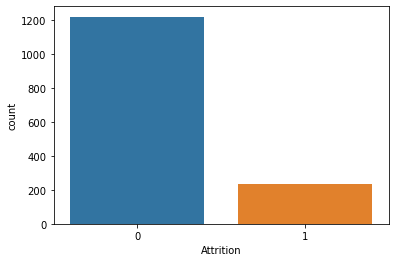

In [50]:
print(dfz["Attrition"].value_counts())

###

sns.countplot(data = dfz, x = "Attrition")

0    1233
1     237
Name: Attrition, dtype: int64


<AxesSubplot:xlabel='Attrition', ylabel='count'>

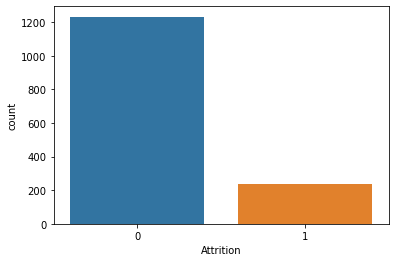

In [51]:
print(df["Attrition"].value_counts())

###

sns.countplot(data = df, x = "Attrition")

Attrition
0    6725.065628
1    4702.055319
Name: MonthlyIncome, dtype: float64


<AxesSubplot:xlabel='Attrition', ylabel='MonthlyIncome'>

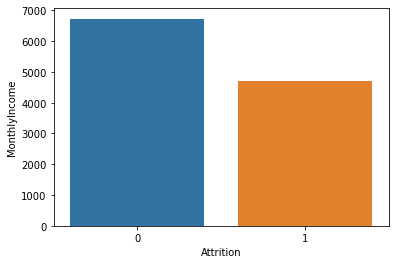

In [52]:
print(dfz["MonthlyIncome"].groupby(dfz["Attrition"]).mean())

###

sns.barplot(data = dfz, x = "Attrition", y = "MonthlyIncome", ci = None)

Attrition
0    4.320755
1    2.817021
Name: YearsWithCurrManager, dtype: float64


<AxesSubplot:xlabel='Attrition', ylabel='YearsWithCurrManager'>

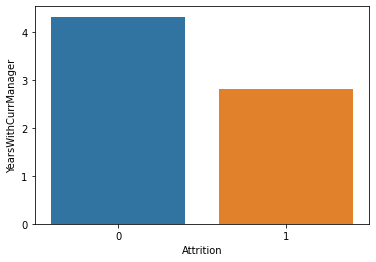

In [53]:
print(dfz["YearsWithCurrManager"].groupby(dfz["Attrition"]).mean())

###

sns.barplot(data = dfz, x = "Attrition", y = "YearsWithCurrManager", ci = None)

Attrition
0    37.358491
1    33.400000
Name: Age, dtype: float64


<AxesSubplot:xlabel='Attrition', ylabel='Age'>

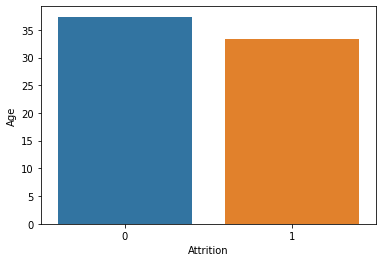

In [54]:
print(dfz["Age"].groupby(dfz["Attrition"]).mean())

###

sns.barplot(data = dfz, x = "Attrition", y = "Age", ci = None)

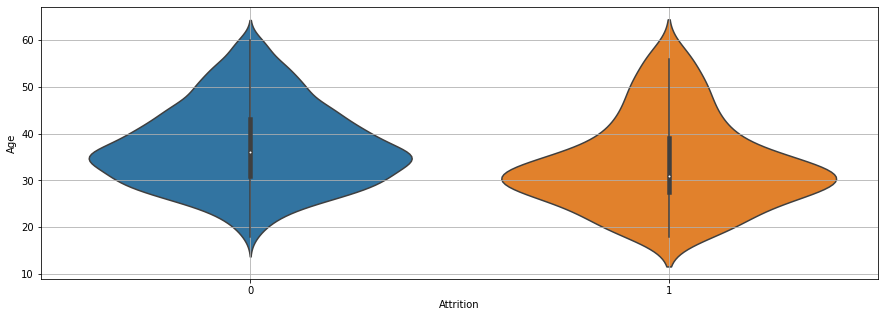

In [58]:
plt.figure(figsize=(15,5))

sns.violinplot(x = dfz["Attrition"], y = df["Age"])

plt.grid()

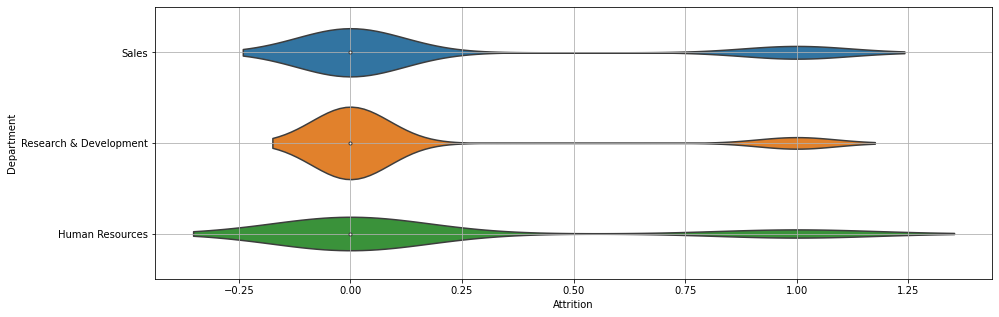

In [59]:
plt.figure(figsize=(15,5))

sns.violinplot(x = dfz["Attrition"], y = df["Department"])

plt.grid()

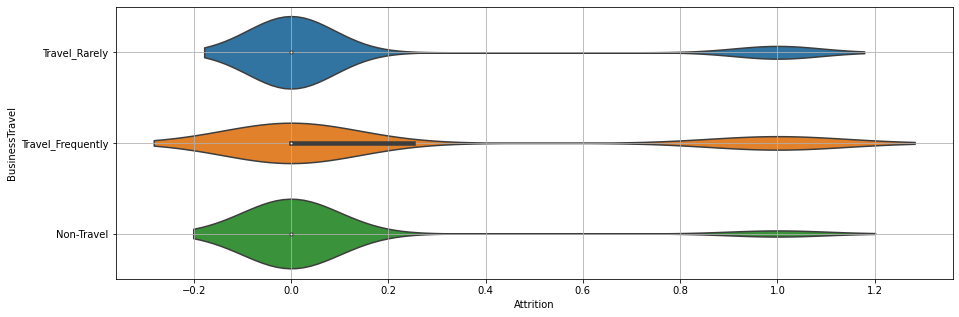

In [62]:
plt.figure(figsize=(15,5))

sns.violinplot(x = dfz["Attrition"], y = df["BusinessTravel"])

plt.grid()